In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

# excel file to read the accelerometer data from 
file_name = '/Users/Maharshi/Downloads/takashin_[Students]assignment5_sampleXYZ.xlsx'

# Read only the X, Y and Z columns for each of 5 activities. 
# Here the array index indicates the kind of activity(0-4).
data = []
for i in range(0, 5):
    temp = pd.read_excel(file_name, sheetname='Sheet1', parse_cols=[4*i+1,4*i+2,4*i+3])
    data.append(temp)

# print(data[0])
# type(data)
print(data[0].shape[0])

4500


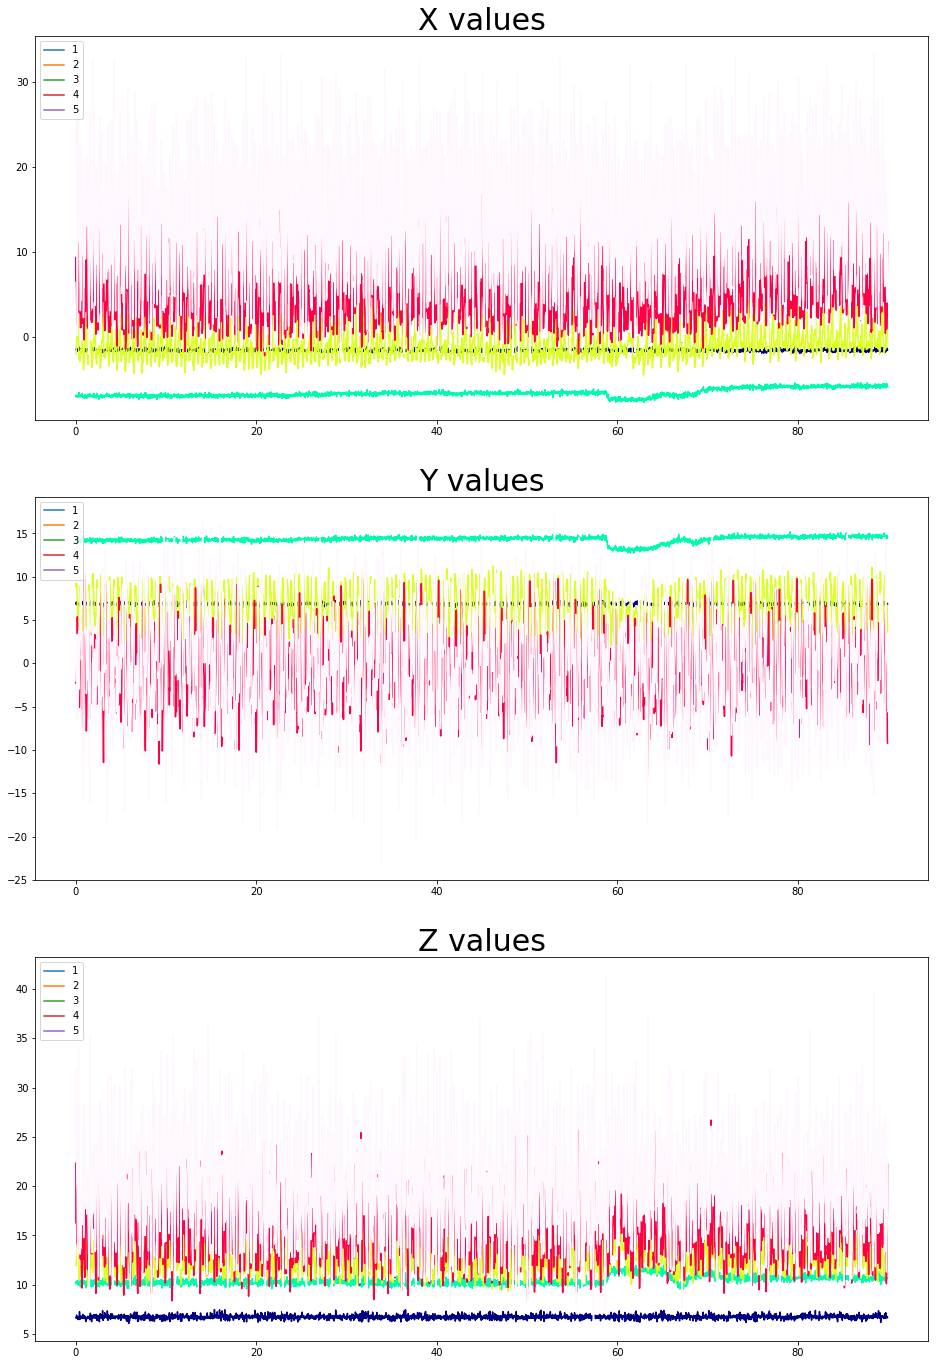

In [3]:
# plot the data to figure out the features that can help properly classify the data

import matplotlib.pyplot as plt

# read the time stamp from the excel file
x = pd.read_excel(file_name, sheetname='Sheet1', parse_cols=[0])

plot_x = np.row_stack((data[0]['X'], data[1]['X'], data[2]['X'], data[3]['X'], data[4]['X'])) 
plot_y = np.row_stack((data[0]['Y'], data[1]['Y'], data[2]['Y'], data[3]['Y'], data[4]['Y']))
plot_z = np.row_stack((data[0]['Z'], data[1]['Z'], data[2]['Z'], data[3]['Z'], data[4]['Z']))

x_stack = np.cumsum(plot_x, axis=0)  
y_stack = np.cumsum(plot_y, axis=0)
z_stack = np.cumsum(plot_z, axis=0)

fig = plt.figure(figsize=(16,24))

# plot X values for every activity
ax1 = fig.add_subplot(311)
ax1.plot(x, x_stack[0,:], label=1)
ax1.plot(x, x_stack[1,:], label=2)
ax1.plot(x, x_stack[2,:], label=3)
ax1.plot(x, x_stack[3,:], label=4)
ax1.plot(x, x_stack[4,:], label=5)
ax1.legend(loc=2)
ax1.set_title('X values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])


# plot Y values for every activity
ax2 = fig.add_subplot(312)
ax2.plot(x, y_stack[0,:], label=1)
ax2.plot(x, y_stack[1,:], label=2)
ax2.plot(x, y_stack[2,:], label=3)
ax2.plot(x, y_stack[3,:], label=4)
ax2.plot(x, y_stack[4,:], label=5)
ax2.legend(loc=2)
ax2.set_title('Y values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])

    
# plot Z values for every activity
ax3 = fig.add_subplot(313)
ax3.plot(x, z_stack[0,:], label=1)
ax3.plot(x, z_stack[1,:], label=2)
ax3.plot(x, z_stack[2,:], label=3)
ax3.plot(x, z_stack[3,:], label=4)
ax3.plot(x, z_stack[4,:], label=5)
ax3.legend(loc=2)
ax3.set_title('Z values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax3.lines))]
for i,j in enumerate(ax3.lines):
    j.set_color(colors[i])

# plt.savefig('smooth_plot.png')

In [4]:
# window size i.e. number of points to consider while extracting features
points = 300

X_train = []
Y_train = []

# calculate features like mean and std across all activites along a particular window size
for i in range(0, 5):
    
    for j in range(0, data[i].shape[0]//points):
        
#         calculate the mean and standard deviation for a window of points value
        mean_x = np.mean(data[i]['X'][j*points:j*points+points])
        mean_y = np.mean(data[i]['Y'][j*points:j*points+points])
        mean_z = np.mean(data[i]['Z'][j*points:j*points+points])
        
        std_x = np.std(data[i]['X'][j*points:j*points+points])
        std_y = np.std(data[i]['Y'][j*points:j*points+points])
        std_z = np.std(data[i]['Z'][j*points:j*points+points])

        median_x = np.median(data[i]['X'][j*points:j*points+points])
        median_y = np.median(data[i]['Y'][j*points:j*points+points])
        median_z = np.median(data[i]['Z'][j*points:j*points+points])
        
        X_train.append((mean_x, mean_y, mean_z, std_x, std_y, std_z, median_x, median_y, median_z))
        Y_train.append(i+1)

In [5]:
print(np.array(X_train).shape)
print (data[0].shape[0]//points)

(75, 9)
15


In [6]:
#change to matrix
X = np.array(X_train) 
Y = np.array(Y_train)

###### Split data into test(1/3) and training(2/3) set 

In [15]:
from sklearn import cross_validation

#separate data into test and training set
print("Splitting data into 2/3 training set & 1/3 test set...")
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.33, random_state=33)

Splitting data into 2/3 training set & 1/3 test set...


In [8]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, Y_train)

Y_hat = clf.predict(X_test)

print(Y_test)
print(Y_hat)

metrics.accuracy_score(Y_hat, Y_test)

[4 5 1 1 1 1 5 2 3 5 4 4 1 3 2 2 5 4 3 1 2 3 1 4 5]
[4 5 1 1 1 1 5 2 3 5 4 4 1 3 2 2 5 4 3 1 2 3 1 4 5]


1.0

In [156]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, Y_train)
print(lin_clf.score(X_test, Y_test))

1.0


In [14]:
# try with varying different parameters like C, etc.
C = [0.1, 0.2, 0.5, 1]
for i in C:
    linear_test_score = svm.SVC(kernel='linear', C=i).fit(X_train, Y_train).score(X_test, Y_test)
    print (linear_test_score)

1.0
1.0
1.0
1.0
